<a href="https://colab.research.google.com/github/CTSP-Software/ctsp-php/blob/master/TestePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import matplotlib.pyplot as plt

from dataclasses import astuple, dataclass
from typing import List

import numpy as np 
from scipy.signal import find_peaks 
from scipy import signal

from scipy.stats.mstats import gmean
from scipy.stats.mstats import hmean

from pandas.core.arrays import string_

from google.colab import drive


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Python/Export_Spectra-utf-8.csv", delimiter=";",engine='python', header=None, skiprows=[0])

In [ ]:
dados.head(15)

,0,1,2,3,4,5,6,7,8,9,...,12803,12804,12805,12806,12807,12808,12809,12810,12811,12812
0,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,17/10/2022 11:41:36,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,004805","0,003692","0,004393","0,003843","0,002211","0,002074","0,004195","0,004698","0,004058","0,003736"
1,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,17/10/2022 11:40:16,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,003526","0,002520","0,001788","0,002971","0,002818","0,002264","0,001823","0,002020","0,002007","0,001916"
2,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,23/09/2022 15:19:07,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,000526","0,000419","0,000589","0,000669","0,000589","0,000419","0,000482","0,000410","0,000455","0,000366"
3,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,03/09/2022 15:09:34,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,000455","0,000425","0,000303","0,000455","0,000546","0,000243","0,000334","0,000394","0,000212","0,000152"
4,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,03/09/2022 15:03:50,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,000469","0,000406","0,000406","0,000531","0,000469","0,000406","0,000656","0,000281","0,000281","0,000281"
5,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,26/08/2022 13:19:42,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,003601","0,002056","0,003111","0,004451","0,003951","0,004150","0,003676","0,003569","0,004451","0,003402"
6,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,26/08/2022 13:18:16,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,003113","0,002179","0,001997","0,002153","0,001816","0,002594","0,003164","0,002801","0,002023","0,001919"
7,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,05/08/2022 10:37:50,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,000290","0,000166","0,000207","0,000331","0,000290","0,000290","0,000290","0,000290","0,000290","0,000290"
8,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,05/07/2022 13:11:42,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,000162","0,000162","0,000222","0,000243","0,000209","0,000270","0,000222","0,000222","0,000243","0,000182"
9,\Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBO...,01/06/2022 15:12:04,g,Pico a pico,1,12801,"5000,000","1,600",NaN,NaN,...,"0,000462","0,000578","0,000462","0,000318","0,000347","0,000318","0,000289","0,000347","0,000144","0,000347"


In [4]:
#criação de uma classe para tratamento dos dados

@dataclass
class entrada:
  def __init__(self, caminho:str,dts:str,unidade:str,deteccao:str,canal:int,linhas:int,frequencia:float,velocidade:float,valor_processo:str,unidade_2:str,bov_gap:str,digital:str,dado:List):
      self.caminho = caminho
      self.dts = dts
      self.unidade = unidade
      self.deteccao = deteccao
      self.canal = canal
      self.linhas = linhas
      self.frequencia = frequencia
      self.velocidade = velocidade
      self.valor_processo = valor_processo
      self.unidade_2 = unidade_2
      self.bov_gap = bov_gap
      self.digital = digital
      self.dado = dado

vetor_entradas = []


In [5]:
with open('/content/drive/MyDrive/Python/Export_Spectra-utf-8.csv', 'r') as csv_file:

  csv_data = csv.reader(csv_file, delimiter=';')
  next(csv_data)

  for row in csv_data:
    vetor_entradas.append(entrada(row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10],row[11],row[12:]))

  x = vetor_entradas[5].dado[0:12800]

  f = []
  k = []

  for i, k in enumerate(x):
    k = float(x[i].replace(',', '.'))
    f.append(k)

  #f.append(float(x[0].replace(',', '.')))
  #f.append(float(x[1].replace(',', '.')))
  #f.append(float(x[2].replace(',', '.')))
  #f.append(float(x[3].replace(',', '.')))
  #f.append(float(x[4].replace(',', '.')))

  print("Caminho: ",vetor_entradas[5].caminho)
  print("DTS: ",vetor_entradas[5].dts)
  print("Unidade: ",vetor_entradas[5].unidade)
  print("Detecção: ",vetor_entradas[5].deteccao)
  print("Canal: ",vetor_entradas[5].canal)
  print("Linhas: ",vetor_entradas[5].linhas)
  print("Frequência: ",vetor_entradas[5].frequencia)
  print("Velocidade: ",vetor_entradas[5].velocidade)
  print("Valor do processo: ",vetor_entradas[5].valor_processo)
  print("Unidade: ",vetor_entradas[5].unidade_2)
  print("BOV/GAP: ",vetor_entradas[5].bov_gap)
  print("digital: ",vetor_entradas[5].digital)
  print("Dados: ",vetor_entradas[5].dado[3])
  #print("Dados: ",f)


Caminho:  \Hierarquia\TRANSPORTADORES\TR-3120NA-01\TAMBOR 1 - ACION.\LDAACT
DTS:  26/08/2022 13:19:42
Unidade:  g
Detecção:  Pico a pico
Canal:  1
Linhas:  12801
Frequência:  5000,000
Velocidade:  1,600
Valor do processo:  N/A
Unidade:  N/A
BOV/GAP:  N/A
digital:  N/A
Dados:  0,000350


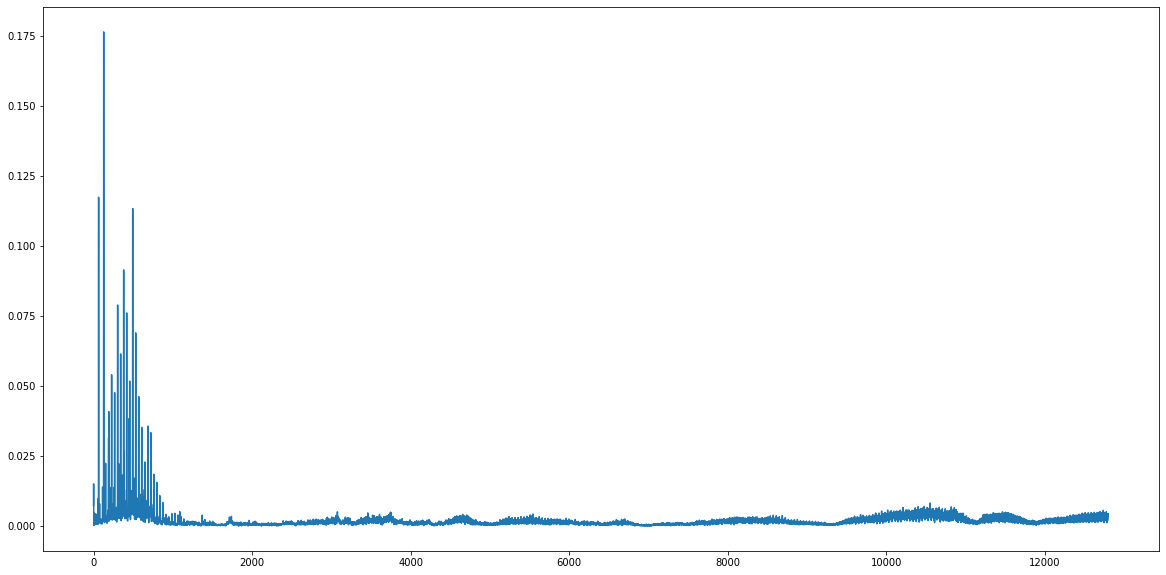

In [8]:
plt.rcParams['figure.figsize'] = [20, 10] 
plt.plot(f)
plt.show()